For iteration  1  Price:  20  Revenue cost:  -300.0
For iteration  2  Price:  20.1  Revenue cost:  -300.995
For iteration  3  Price:  18.399  Revenue cost:  -282.70839950000004
For iteration  4  Price:  16.70601  Revenue cost:  -261.63491493995
For iteration  5  Price:  15.183039899999999  Revenue cost:  -240.22884669750397
For iteration  6  Price:  13.827668601  Revenue cost:  -219.22784856045934
For iteration  7  Price:  12.62291832399  Revenue cost:  -199.0185162126387
For iteration  8  Price:  11.5521989666601  Revenue cost:  -179.83931851715164
For iteration  9  Price:  10.6006143278344  Revenue cost:  -161.83191777128803
For iteration  10  Price:  9.754910277556647  Revenue cost:  -145.06817106510928
For iteration  11  Price:  9.003305885275985  Revenue cost:  -129.56941812635696
For iteration  12  Price:  8.335330901443127  Revenue cost:  -115.32105642501747
For iteration  13  Price:  7.741680062753857  Revenue cost:  -102.28359678559542
For iteration  14  Price:  7.214083480996

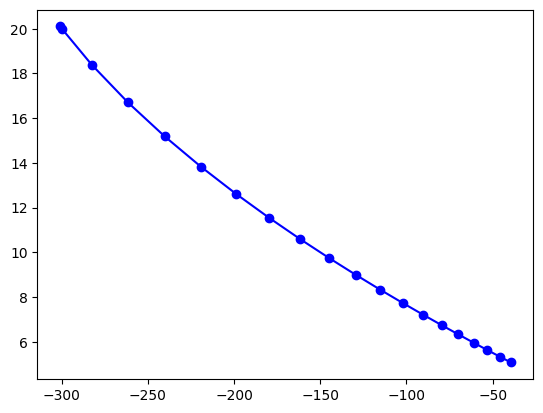

In [33]:
import numpy as np
import matplotlib.pyplot as plt
def fn(w):
  return (0.5*(w**2)-(30*w))+100
def derivative(w):
  return w-30
def GDwM(w,beta,lr,ow,iteration):
  for i in range(iteration):
    der=derivative(w)
    gdm=beta*ow+(1-beta)*derivative(w)
    cost=fn(w)
    x.append(w)
    y.append(cost)
    print("For iteration ",i+1," Price: ",w, " Revenue cost: ",cost)
    ow=w
    w=w-lr*gdm
w=20
lr=0.1
beta=0.9
ow=0
iteration=20
x,y=list(),list()
GDwM(w,beta,lr,ow,iteration)
plt.plot(y,x,c='b',marker='o')

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [35]:
df=pd.read_csv('/content/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [37]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [38]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


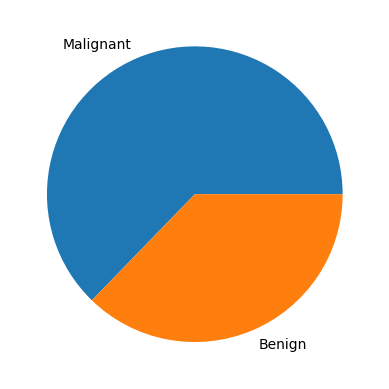

In [39]:
diag = df["diagnosis"].value_counts()
plt.pie(diag, labels=["Malignant", "Benign"])
plt.show()

In [40]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [41]:
X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
model2 = Sequential()
model2.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
model3 = Sequential()
model3.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model3.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
mt = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 2s 19ms/step - loss: 4.9906 - accuracy: 0.7995 - val_loss: 4.5716 - val_accuracy: 0.9231
Epoch 2/10
12/12 [==============================] - 0s 7ms/step - loss: 4.3339 - accuracy: 0.9341 - val_loss: 4.0624 - val_accuracy: 0.9560
Epoch 3/10
12/12 [==============================] - 0s 6ms/step - loss: 3.8500 - accuracy: 0.9505 - val_loss: 3.6148 - val_accuracy: 0.9560
Epoch 4/10
12/12 [==============================] - 0s 7ms/step - loss: 3.4114 - accuracy: 0.9670 - val_loss: 3.1953 - val_accuracy: 0.9670
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 3.0035 - accuracy: 0.9698 - val_loss: 2.8084 - val_accuracy: 0.9560
Epoch 6/10
12/12 [==============================] - 0s 7ms/step - loss: 2.6252 - accuracy: 0.9725 - val_loss: 2.4519 - val_accuracy: 0.9670
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 2.2783 - accuracy: 0.9780 - val_loss: 2.1225 - val_accuracy: 0.9780
Epoch 8/10
12/12 [=

In [47]:
mt2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 2s 20ms/step - loss: 1.7168 - accuracy: 0.9286 - val_loss: 1.5180 - val_accuracy: 0.9560
Epoch 2/10
12/12 [==============================] - 0s 7ms/step - loss: 1.3903 - accuracy: 0.9560 - val_loss: 1.3028 - val_accuracy: 0.9560
Epoch 3/10
12/12 [==============================] - 0s 7ms/step - loss: 1.2102 - accuracy: 0.9588 - val_loss: 1.1508 - val_accuracy: 0.9560
Epoch 4/10
12/12 [==============================] - 0s 5ms/step - loss: 1.0675 - accuracy: 0.9698 - val_loss: 1.0250 - val_accuracy: 0.9670
Epoch 5/10
12/12 [==============================] - 0s 7ms/step - loss: 0.9411 - accuracy: 0.9863 - val_loss: 0.9165 - val_accuracy: 0.9670
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 0.8330 - accuracy: 0.9890 - val_loss: 0.8180 - val_accuracy: 0.9670
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 0.7372 - accuracy: 0.9890 - val_loss: 0.7306 - val_accuracy: 0.9670
Epoch 8/10
12/12 [=

In [48]:
mt3 = model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 1s 22ms/step - loss: 12.2570 - accuracy: 0.7967 - val_loss: 11.3628 - val_accuracy: 0.8791
Epoch 2/10
12/12 [==============================] - 0s 6ms/step - loss: 10.7187 - accuracy: 0.9368 - val_loss: 9.9120 - val_accuracy: 0.9451
Epoch 3/10
12/12 [==============================] - 0s 7ms/step - loss: 9.3198 - accuracy: 0.9478 - val_loss: 8.5830 - val_accuracy: 0.9451
Epoch 4/10
12/12 [==============================] - 0s 7ms/step - loss: 8.0329 - accuracy: 0.9560 - val_loss: 7.3578 - val_accuracy: 0.9560
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 6.8529 - accuracy: 0.9615 - val_loss: 6.2399 - val_accuracy: 0.9341
Epoch 6/10
12/12 [==============================] - 0s 7ms/step - loss: 5.7822 - accuracy: 0.9643 - val_loss: 5.2341 - val_accuracy: 0.9341
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 4.8221 - accuracy: 0.9670 - val_loss: 4.3312 - val_accuracy: 0.9341
Epoch 8/10
12/12

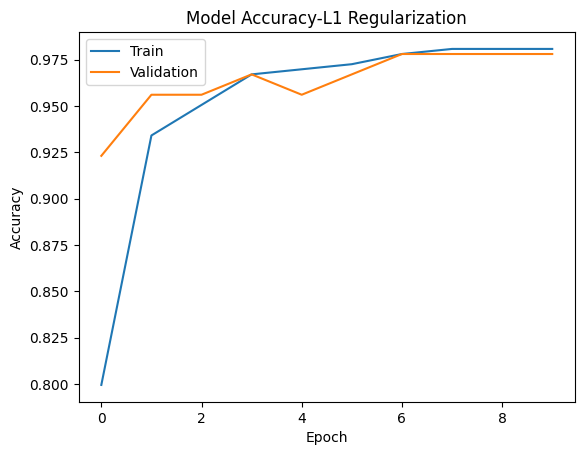

In [49]:
plt.plot(mt.history['accuracy'])
plt.plot(mt.history['val_accuracy'])
plt.title('Model Accuracy-L1 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

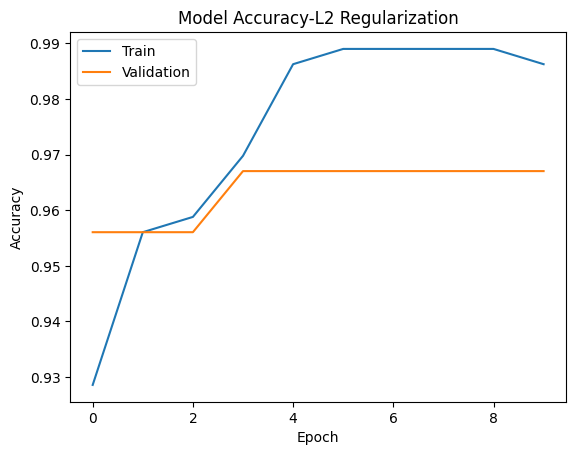

In [50]:
plt.plot(mt2.history['accuracy'])
plt.plot(mt2.history['val_accuracy'])
plt.title('Model Accuracy-L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

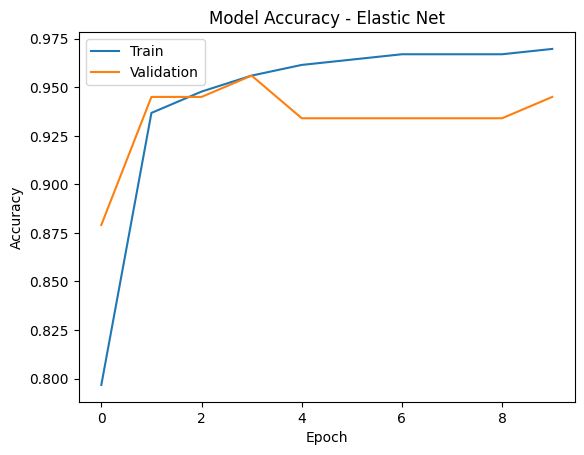

In [51]:
plt.plot(mt3.history['accuracy'])
plt.plot(mt3.history['val_accuracy'])
plt.title('Model Accuracy - Elastic Net')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
#model 1
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
print("roc score",roc_auc)

4/4 [==============================] - 0s 4ms/step
roc score 0.9963969865705863


In [53]:
#model 2
y_probs2 = model2.predict(X_test)
y_pred2 = (y_probs2 > 0.5).astype(int)
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)
cf2 = confusion_matrix(y_test, y_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.predict(X_test))
roc_auc2 = auc(fpr2, tpr2)
print("roc score",roc_auc2)

4/4 [==============================] - 0s 3ms/step
roc score 0.9980347199475925


In [54]:
#model 3
y_probs3 = model3.predict(X_test)
y_pred3 = (y_probs3 > 0.5).astype(int)
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)
f13 = f1_score(y_test, y_pred)
cf3 = confusion_matrix(y_test, y_pred)
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict(X_test))
roc_auc3 = auc(fpr3, tpr3)
print("roc score",roc_auc3)

4/4 [==============================] - 0s 4ms/step
roc score 0.9970520799213888


In [55]:
print("L1 Regularization")
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

print("\nL2 Regularization")
print("Accuracy: ",accuracy2)
print("Precision: ",precision2)
print("Recall: ",recall2)
print("F1 Score: ",f12)

print("\nElastic Net")
print("Accuracy: ",accuracy3)
print("Precision: ",precision3)
print("Recall: ",recall3)
print("F1 Score: ",f13)

L1 Regularization
Accuracy:  0.9649122807017544
Precision:  0.975609756097561
Recall:  0.9302325581395349
F1 Score:  0.9523809523809524

L2 Regularization
Accuracy:  0.9649122807017544
Precision:  0.975609756097561
Recall:  0.9302325581395349
F1 Score:  0.9523809523809524

Elastic Net
Accuracy:  0.9649122807017544
Precision:  0.975609756097561
Recall:  0.9302325581395349
F1 Score:  0.9523809523809524


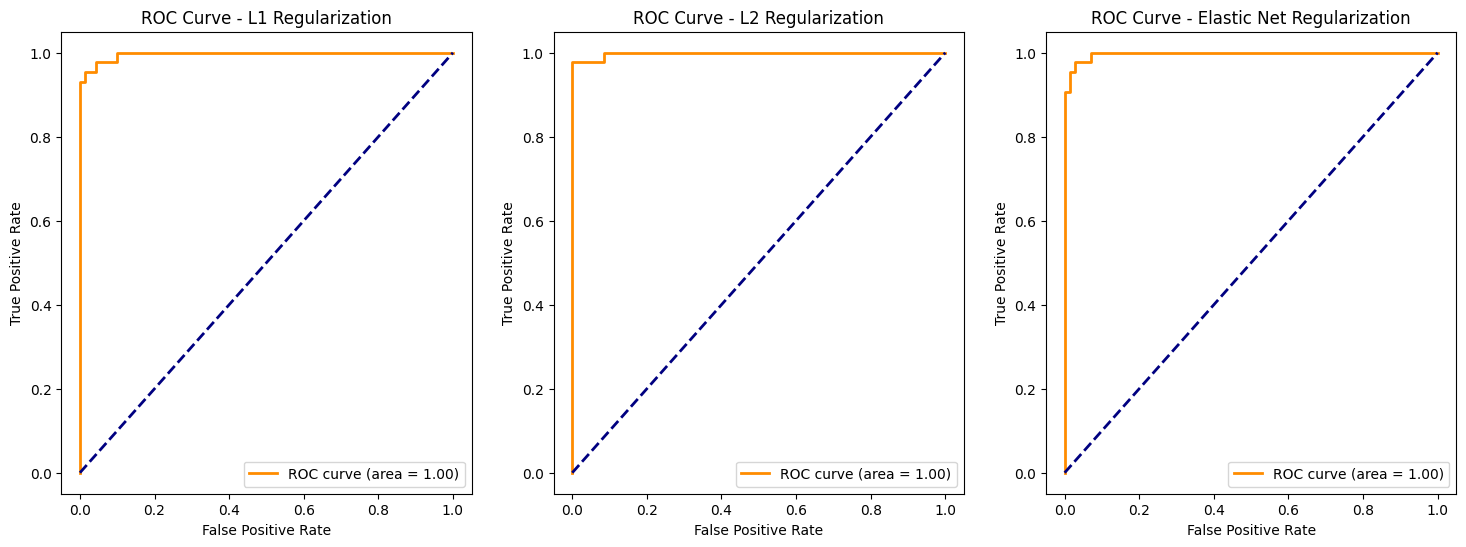

In [56]:
plt.figure(figsize=(18, 6))

# L1 Regularization
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - L1 Regularization')
plt.legend(loc='lower right')

# L2 Regularization
plt.subplot(1, 3, 2)
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - L2 Regularization')
plt.legend(loc='lower right')

# Elastic Net
plt.subplot(1, 3, 3)
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Elastic Net Regularization')
plt.legend(loc='lower right')

plt.show()